In [18]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from nltk import tokenize
from string import punctuation
from unidecode import unidecode

In [2]:
df = pd.read_csv('/kaggle/input/imdb-ptbr/imdb-reviews-pt-br.csv')

In [3]:
df.shape

(49459, 4)

In [4]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [6]:
df['sentiment'].value_counts(normalize=True)

sentiment
neg    0.500718
pos    0.499282
Name: proportion, dtype: float64

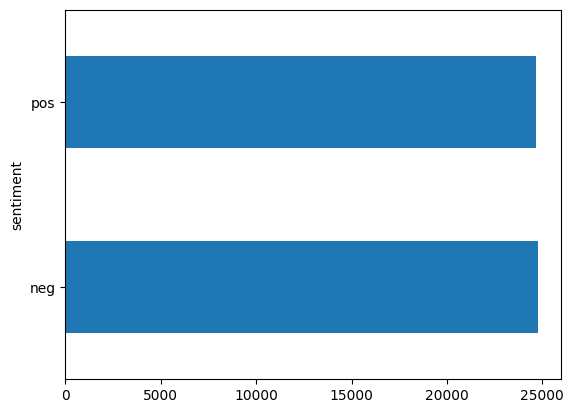

In [7]:
df['sentiment'].value_counts().plot.barh()
plt.show()

In [8]:
df['sentiment'] = (df['sentiment'] == 'pos').astype(int)

In [9]:
language='portuguese'
stop_words = [unidecode(stop_word) for stop_word in nltk.corpus.stopwords.words(language)]
punctiations_list = list(punctuation)
rslp_stemmer = nltk.RSLPStemmer()
punctuation_tokenizer = tokenize.WordPunctTokenizer()

def clean_text(text):
    cleaned_text = unidecode(text.lower())
    punctuation_tokens = punctuation_tokenizer.tokenize(cleaned_text)
    cleaned_tokens = [rslp_stemmer.stem(token) for token in punctuation_tokens if token not in punctiations_list and token not in stop_words]
    return ' '.join(cleaned_tokens)

In [10]:
df['text_pt'] = df['text_pt'].apply(clean_text)

In [11]:
def plot_word_cloud(data,text_column_name):
    all_texts = ' '.join(data[text_column_name])
    word_cloud = WordCloud(width=800,height=600,max_font_size=110,collocations=False).generate(all_texts)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

Word Cloud of positive reviews


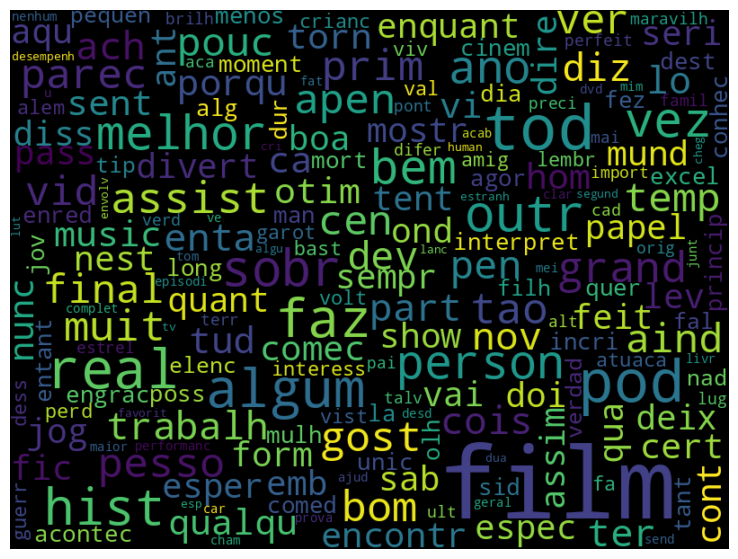

In [12]:
print('Word Cloud of positive reviews')
plot_word_cloud(df[df['sentiment'] == 1],'text_pt')

Word Cloud of negative reviews


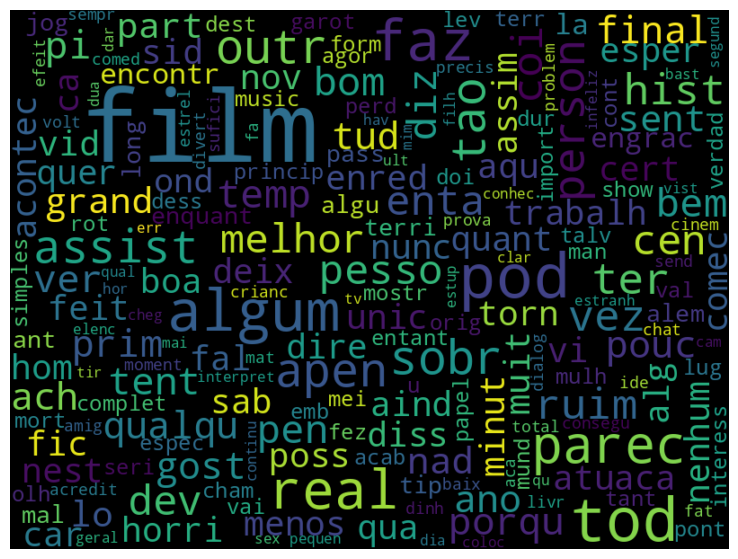

In [13]:
print('Word Cloud of negative reviews')
plot_word_cloud(df[df['sentiment'] == 0],'text_pt')

In [14]:
white_space_tokenizer = tokenize.WhitespaceTokenizer()

def plot_top_words(data,text_column_name,number_of_words=10):
    all_texts = ' '.join(data[text_column_name])
    white_space_tokens = white_space_tokenizer.tokenize(all_texts)
    words_frequency = nltk.FreqDist(white_space_tokens)
    df_words_frequency = pd.DataFrame({
        'Word': words_frequency.keys(), 
        'Frequency': words_frequency.values()
    })
    df_top_words = df_words_frequency.nlargest(columns="Frequency",n=number_of_words)
    plt.figure(figsize=(12,8))
    sns.barplot(data=df_top_words,x='Word',y='Frequency')
    plt.show()

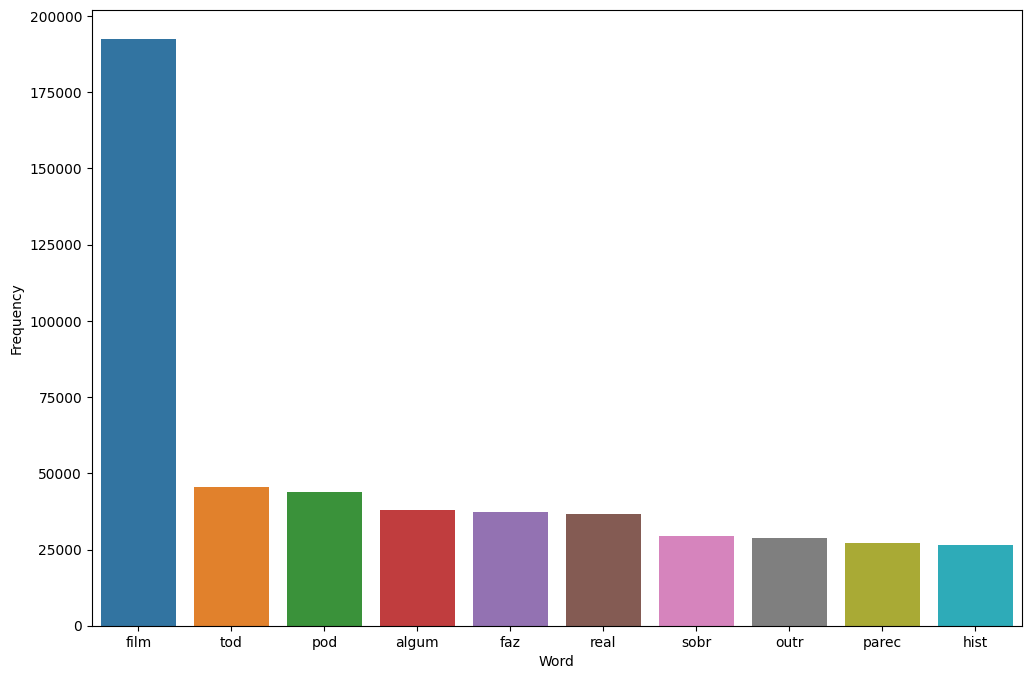

In [15]:
plot_top_words(df,'text_pt',10)

In [46]:
def classify_text(data,feature_column_name,target_column_name,test_size=0.2,max_iter=120,ngram_range=(1,2)):
    x = df[feature_column_name]
    y = df[target_column_name]
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tokens = vectorizer.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(tokens,y,random_state=42,test_size=test_size)
    logistic_reg = LogisticRegression(max_iter=max_iter)
    logistic_reg.fit(x_train,y_train)
    return logistic_reg.score(x_test,y_test)

In [49]:
classify_text(df,'text_pt','sentiment',test_size=0.1,max_iter=400)

0.8855640921957137